# Testing my model implementations

In [1]:
import numpy as np                                                              
import matplotlib.pyplot as plt 

import utils as u
import linearModels as lm
import neuralNet as nn
from decisionTrees import DecisionTree

# Linear Models

## Models on different data sets

In [2]:
def run(model, n, plotting=False, axes=None, nTestPoints=1000):
    '''
    A function that generates some data, and judges a models
    performance in trying to learn this data. Turning plotting on
    will generate graphs of these performance metrics, which can
    optionally be plotted on specified axes. E_out is estimated
    with nTestPoints.
    '''
    f, line1 = u.genF()
    X, Y = u.genData(f, n)
    it, E_ins = model.learn(X, Y)
    
    if plotting:
        if axes is None:
            fig, axes = plt.subplots(2, 1, figsize=(8,8))
        u.plotE_ins(E_ins, axis=axes[0])
        u.plotLine(*line1, axis=axes[1], label='Target')
        model.quickPlot(X, Y, axis=axes[1])
        axes[1].set_xlim([-1, 1])
        axes[1].set_ylim([-1, 1])
        axes[1].legend()
        
    X2, Y2 = u.genData(f, nTestPoints)
    return it, model.findE_in(X2, Y2)

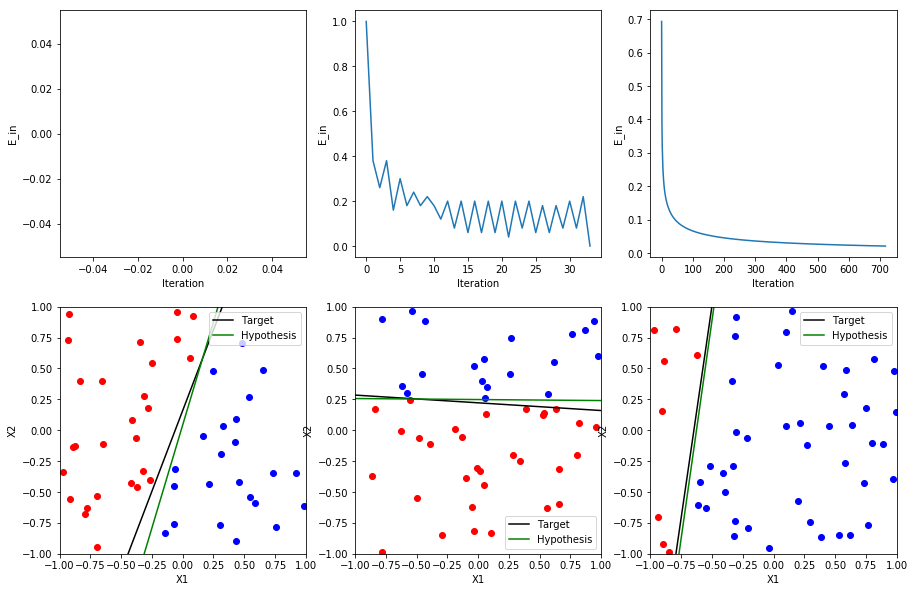

In [3]:
models = [lm.LinearModel(3), lm.Perceptron(3), lm.LogisticRegression(3)]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, model in enumerate(models):
    run(model, 50, plotting=True, axes=axes[:,i])

## Multiple models on same data set

In [4]:
def combinedRun(models, n):
    '''
    Function that compares models on the same data set. Very similar
    to run otherwise.
    '''
    f, line1 = u.genF()
    X, Y = u.genData(f, n)
    
    fig, axes = plt.subplots(2, len(models), figsize=(5 * len(models), 10))
    for i, model in enumerate(models):
        _, E_ins = model.learn(X, Y)
        u.plotE_ins(E_ins, axis=axes[0, i])
        u.plotLine(*line1, axis=axes[1, i], label='Target')  
        model.quickPlot(X, Y, axis=axes[1, i])
        axes[1, i].set_xlim([-1, 1])
        axes[1, i].set_ylim([-1, 1])
        axes[1, i].legend()

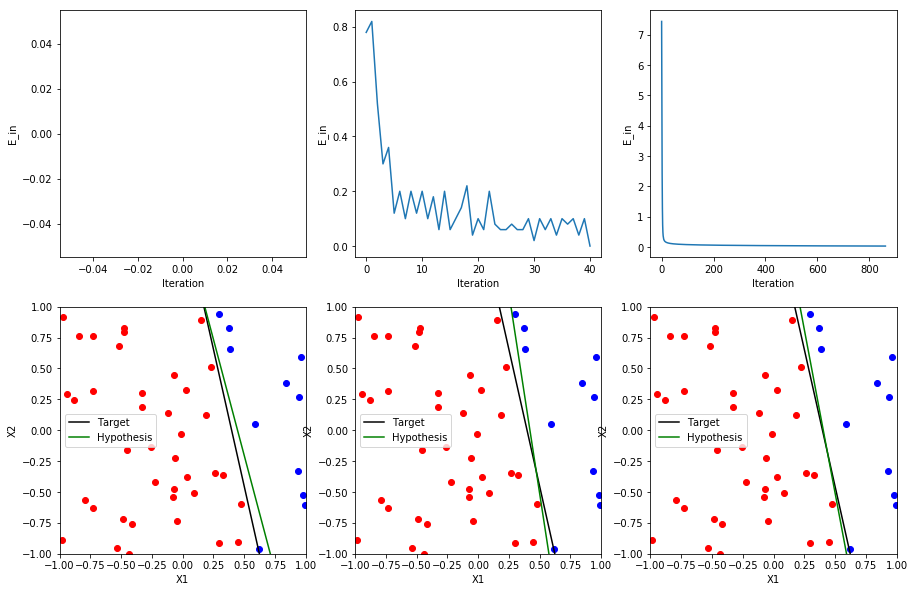

In [7]:
combinedRun(models, 50)

# Decision Tree

In [8]:
f1 = lambda x: (x[0] < -0.3) ^ (x[0] < 0.7)
f2 = lambda x: (np.floor(3 * x[0]) + np.floor(3 * x[1])) % 2
f3, line = u.genF(zero_one=True)

X, Y = u.genData(f3, 1000, appendOnes=False)

In [9]:
d = DecisionTree(10)
d.learn(X, Y)

NameError: name 'DecisionTree' is not defined

In [ ]:
ax = plt.subplot(111)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
u.plotLine(*line, axis=ax);
d.quickPlot(X, Y, axis=ax)

# Neural Net

## One variable function testing

In [ ]:
testFunc = lambda x: np.sin(2 * x)

inputs = np.linspace(-np.pi, np.pi, 200)
outputs = testFunc(inputs)

sizes = [1, 100, 100, 1]

## For cosine, need different nonlinearity
#theta=lambda x: np.exp(x) / (1 + np.exp(x))
#dTheta_ds = lambda x: np.exp(x) / ((1 + np.exp(x)) ** 2)
#model = NeuralNet(sizes, theta=theta, dTheta_ds=dTheta_ds)

model = nn.NeuralNet(sizes)

it, E_ins = model.learn(inputs, outputs, maxIters=1000, trackE_in=True)

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

u.plotE_ins(E_ins, axis=ax[0])
model.quickPlot(inputs, outputs, axis=ax[1])

fig.show()

In [ ]:
inputs = np.random.uniform(-np.pi, np.pi, 20)
outputs = testFunc(inputs)

outputs2 = np.array([model.calculate(i) for i in inputs])
outputs2 - outputs

## Multi-Variable Function Testing

In [ ]:
testFunc = lambda x, y: np.cos(x + y)

inputs = np.linspace(-np.pi / 2, np.pi / 2, 100)
inputs = np.vstack((inputs / 3, inputs * 2 / 3)).T
outputs = testFunc(inputs[:, 0], inputs[:, 1])

sizes = [2, 100, 100, 1]

theta=lambda x: np.exp(x) / (1 + np.exp(x))
dTheta_ds = lambda x: np.exp(x) / ((1 + np.exp(x)) ** 2)
model = nn.NeuralNet(sizes, theta=theta, dTheta_ds=dTheta_ds)
#model = nn.NeuralNet(sizes)

it, E_ins = model.learn(inputs, outputs, maxIters=1000, trackE_in=True)

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

u.plotE_ins(E_ins, axis=ax[0])

ax[1].plot(np.sum(inputs, axis=1), [model.calculate(i) for i in inputs], color='g', label='Net Outputs')
ax[1].plot(np.sum(inputs, axis=1), outputs, color='k', label='Real Outputs')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output')
ax[1].legend()

fig.show()

In [ ]:
inputs = np.random.uniform(-np.pi, np.pi, 20)
inputs = np.vstack((inputs / 3, inputs * 2 / 3)).T
outputs = testFunc(inputs[:, 0], inputs[:, 1])

outputs2 = np.array([model.calculate(i) for i in inputs])
outputs2 - outputs